
# Plotnine Tutorial: Understanding the Grammar of Graphics

## 1. Introduction to Plotnine
plotnine is a data visualization package for Python based on the Grammar of Graphics, which is a system for understanding and building plots. The grammar describes how plots are constructed by combining data, aesthetic mappings, geometric objects, and other components.

To begin, you’ll need to install the plotnine package if you don’t have it installed

pip install plotnine

# 2. The Grammar of Graphics

## The Grammar of Graphics consists of the following key components:

Data: The data you want to visualize.
Aesthetics (aes): How the data is mapped to visual properties, such as x and y coordinates, color, size, etc.
Geometries (geom): The type of plot, like points, lines, bars, etc.
Facets: Subplots based on the data.
Scales: Control the mapping from data to aesthetic properties.
Coordinate systems: Adjust how data is projected on the plane (Cartesian, rotations, polar, etc.).
Themes: Adjust the non-data elements like background, labels, gridlines, etc.

# 3. Creating Your First Plot
Let’s begin by creating a simple scatter plot using the famous mtcars dataset. We’ll show how to set up the basic structure and gradually build complexity.



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   mpg      32 non-null     float64
 1   cyl      32 non-null     int64  
 2   disp     32 non-null     float64
 3   hp       32 non-null     int64  
 4   drat     32 non-null     float64
 5   wt       32 non-null     float64
 6   qsec     32 non-null     float64
 7   vs       32 non-null     int64  
 8   am       32 non-null     int64  
 9   gear     32 non-null     int64  
 10  carb     32 non-null     int64  
 11  fast     32 non-null     int64  
 12  cars     32 non-null     object 
 13  carname  32 non-null     object 
dtypes: float64(5), int64(7), object(2)
memory usage: 3.6+ KB


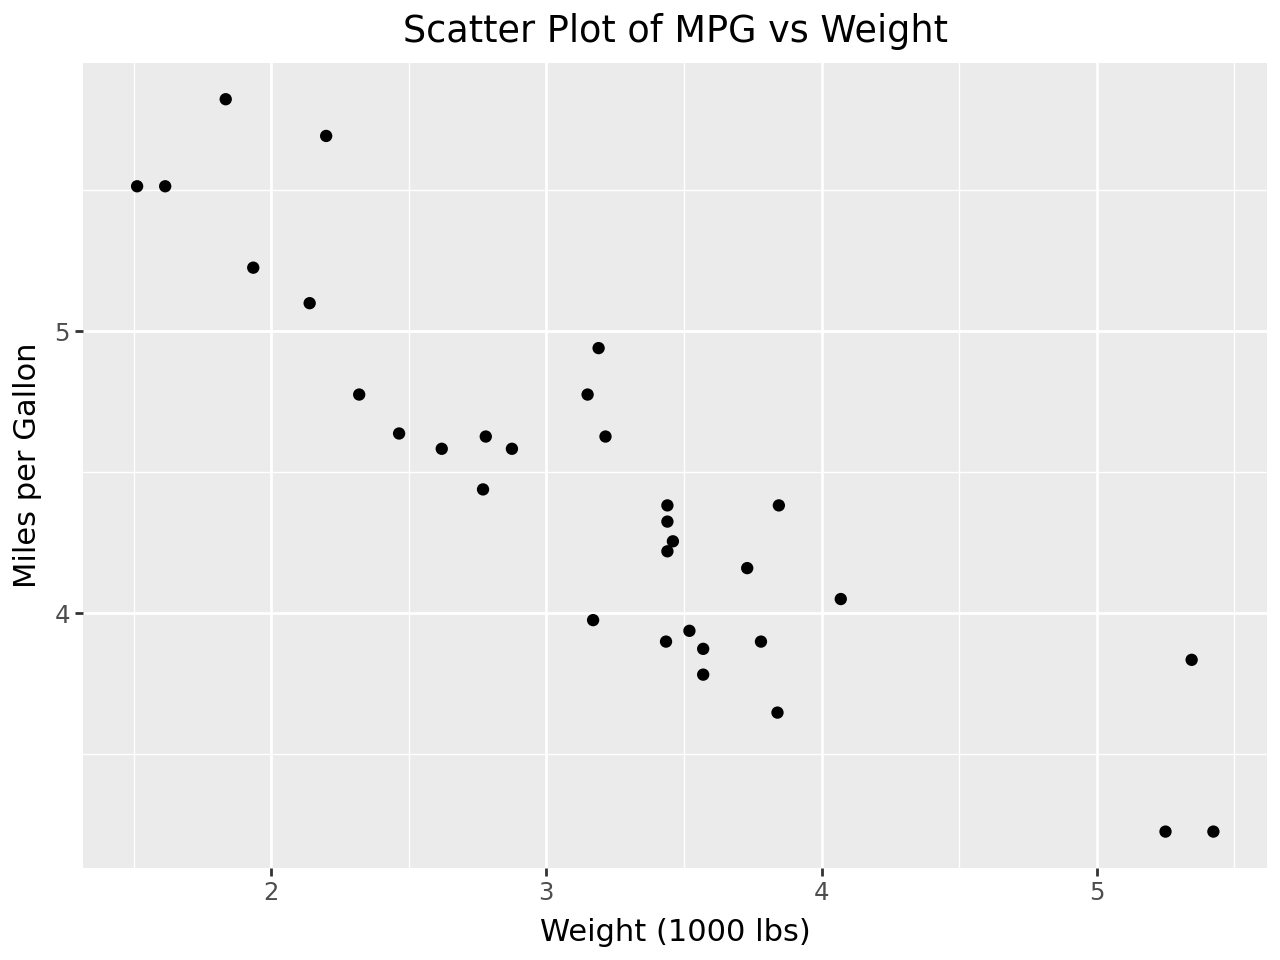

In [47]:
# Import required libraries
import pandas as pd
from plotnine import ggplot, aes, geom_point, labs

# Load the mtcars dataset
mtcars = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/mtcars.csv')

mtcars.info()



# Create a basic scatter plot
(ggplot(mtcars, aes(x='wt', y='mpg')) +
 geom_point() +
 labs(title='Scatter Plot of MPG vs Weight',
      x='Weight (1000 lbs)',
      y='Miles per Gallon'))

# 4. Adding Aesthetic Mappings
In the Grammar of Graphics, aesthetics control how data points are represented visually. You can map variables to size, color, shape, and more.

In [48]:
# Example: Color by cyl (number of cylinders)


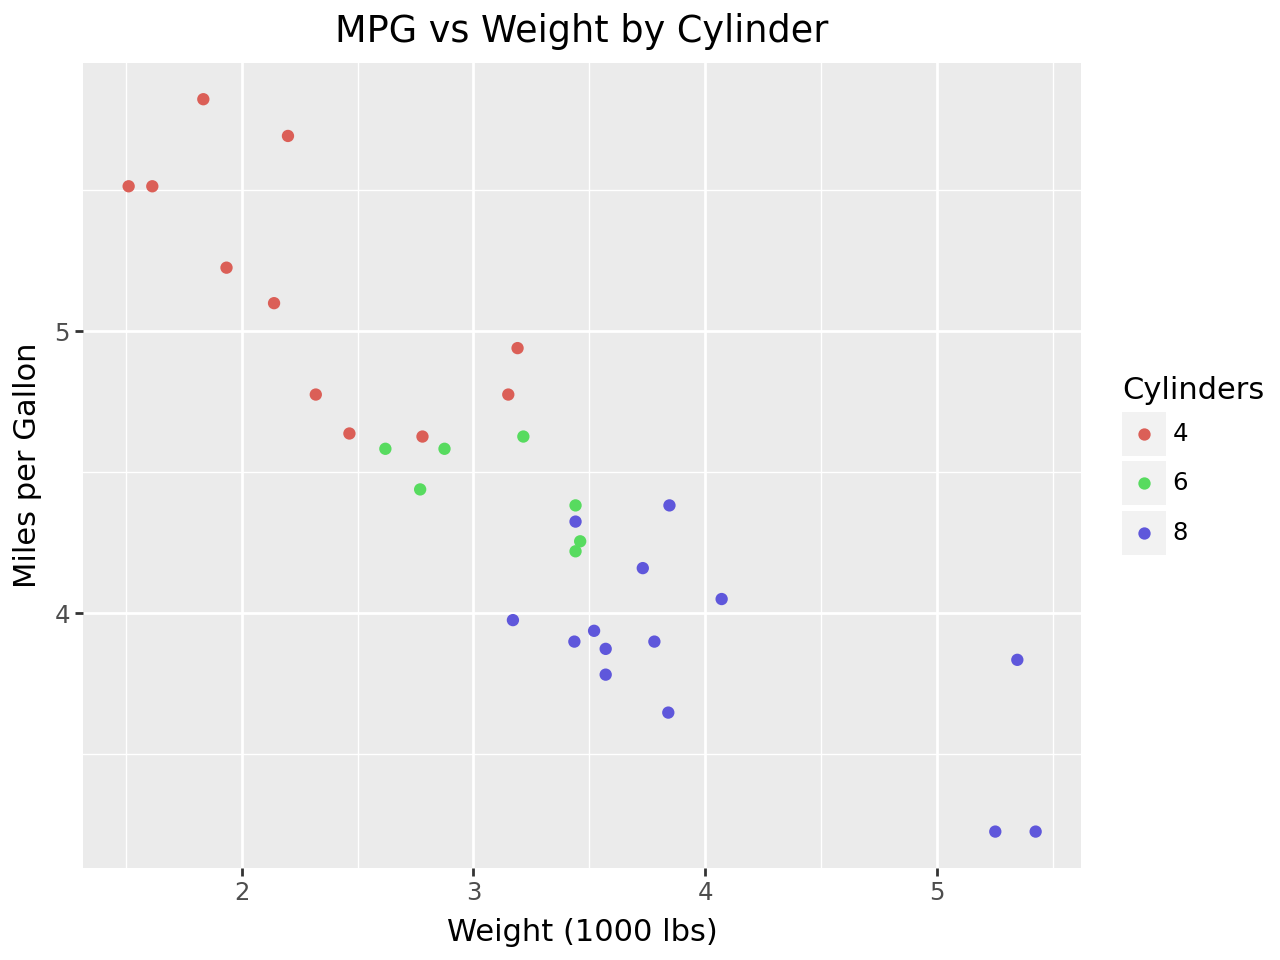

In [49]:
(ggplot(mtcars, aes(x='wt', y='mpg', color='factor(cyl)')) +
 geom_point() +
 labs(title='MPG vs Weight by Cylinder',
      x='Weight (1000 lbs)',
      y='Miles per Gallon',
      color='Cylinders'))



# Example: Size by horsepower (hp)


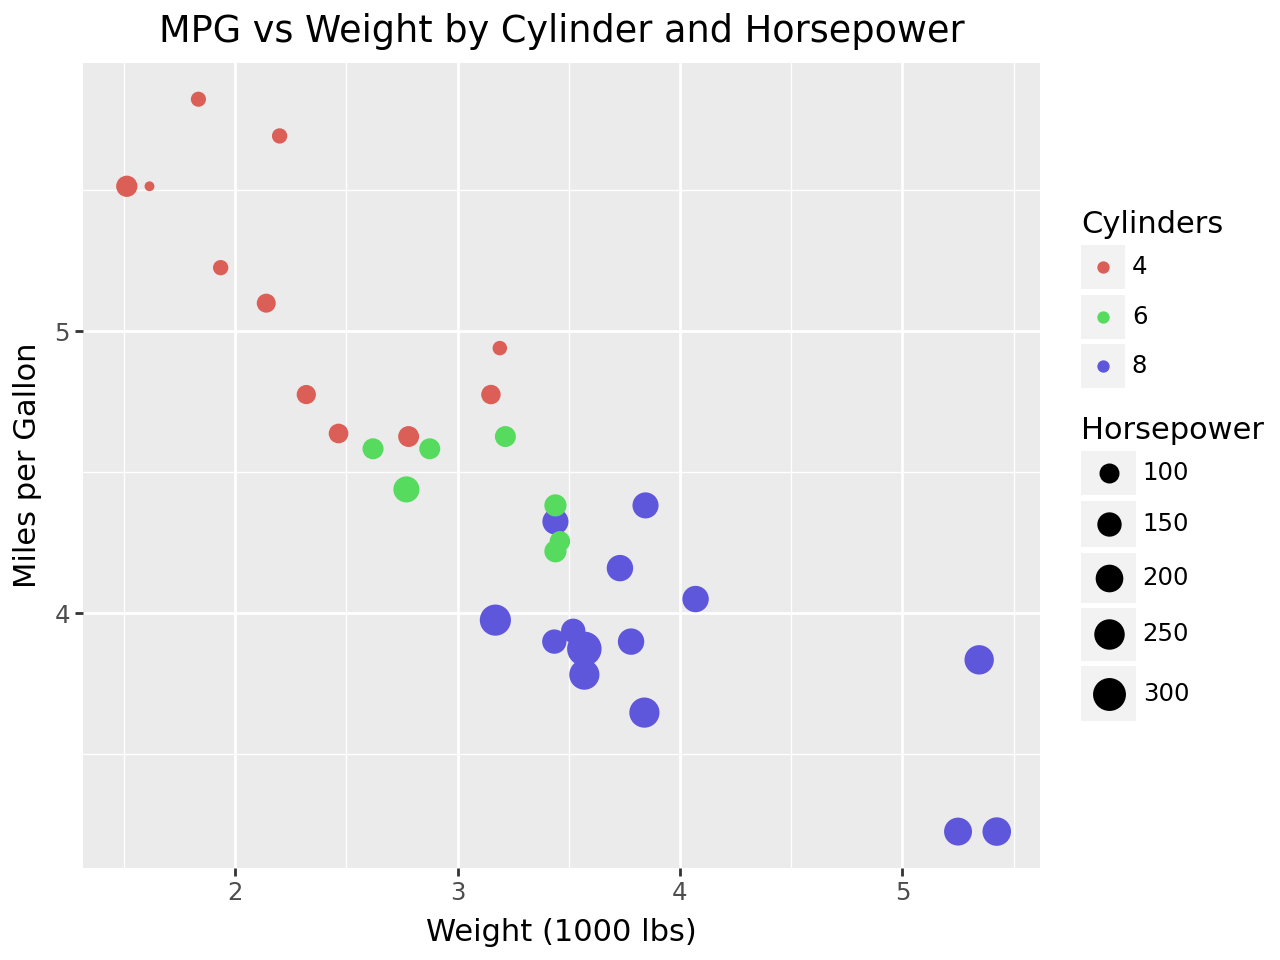

In [52]:
(ggplot(mtcars, aes(x='wt', y='mpg', color='factor(cyl)', size='hp')) +
 geom_point() +
 labs(title='MPG vs Weight by Cylinder and Horsepower',
      x='Weight (1000 lbs)',
      y='Miles per Gallon',
      color='Cylinders',
      size='Horsepower'))

# 5. Geometric Objects
geom_* specifies the type of plot. You can create scatter plots, line charts, bar plots, histograms, etc.



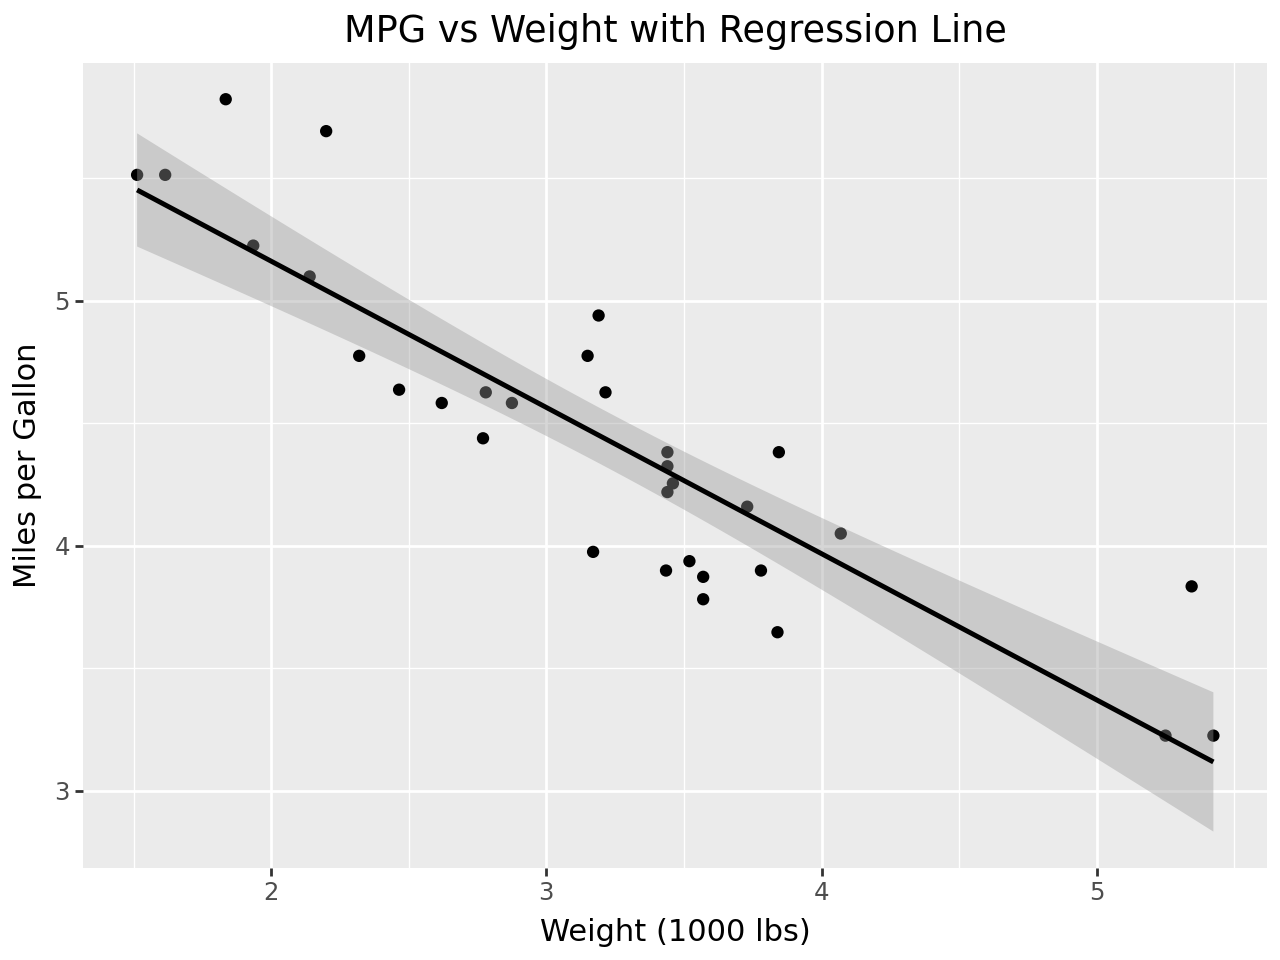

In [17]:
from plotnine import geom_smooth

(ggplot(mtcars, aes(x='wt', y='mpg')) +
 geom_point() +
 geom_smooth(method='lm') +  # Linear regression line
 labs(title='MPG vs Weight with Regression Line',
      x='Weight (1000 lbs)',
      y='Miles per Gallon'))


# 6. Faceting
Faceting allows you to split your plot into multiple panels based on a factor.



## Example: Facet by cyl


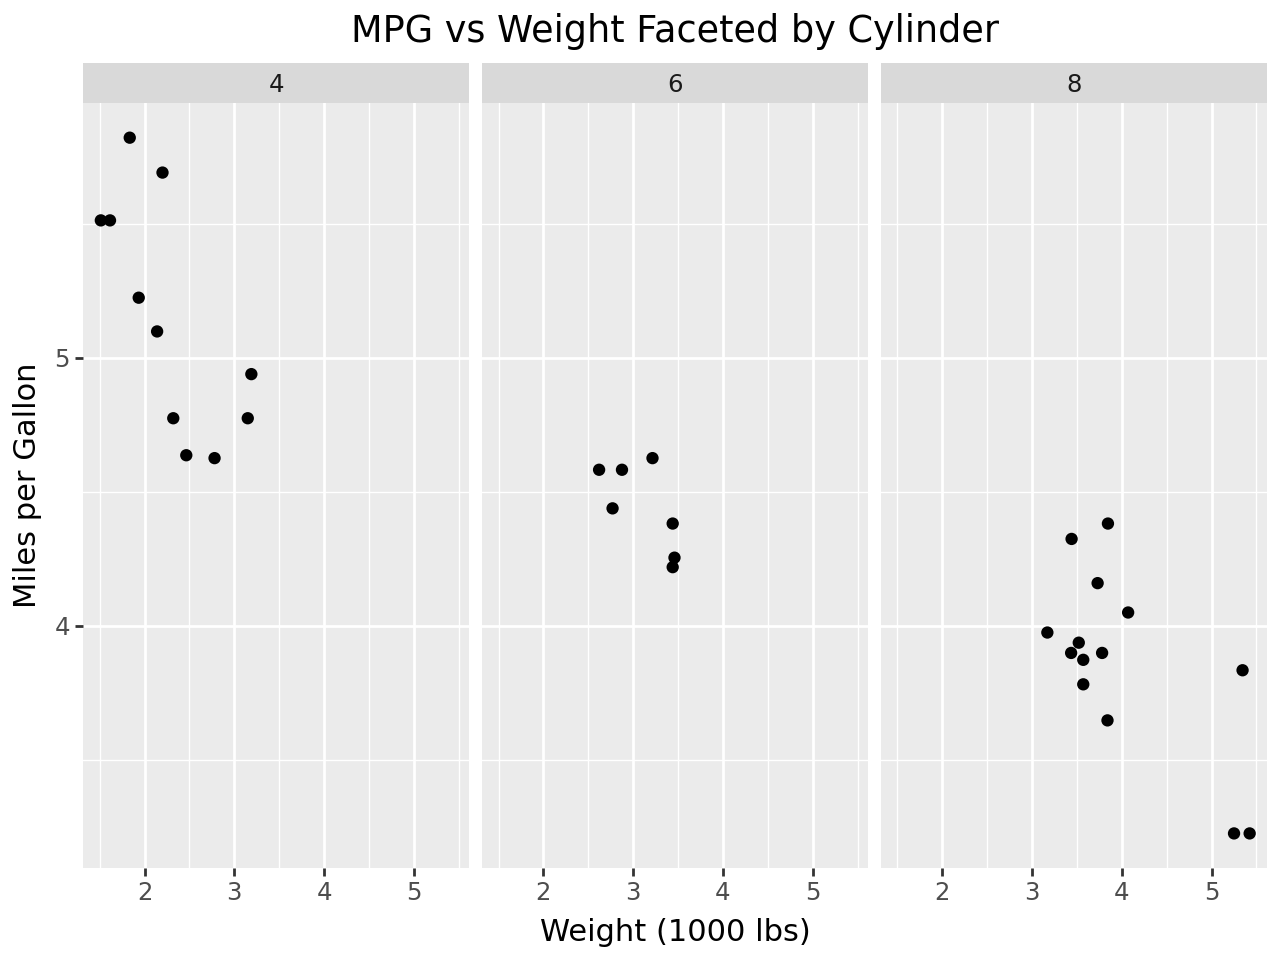

In [19]:
from plotnine import facet_wrap

(ggplot(mtcars, aes(x='wt', y='mpg')) +
 geom_point() +
 facet_wrap('~cyl') +  # Split into subplots by cylinders
 labs(title='MPG vs Weight Faceted by Cylinder',
      x='Weight (1000 lbs)',
      y='Miles per Gallon'))

# 7. Customizing Scales
Scales control the mapping from data to aesthetic attributes. You can customize scales for color, size, and more.



## Example: Custom Color Scale


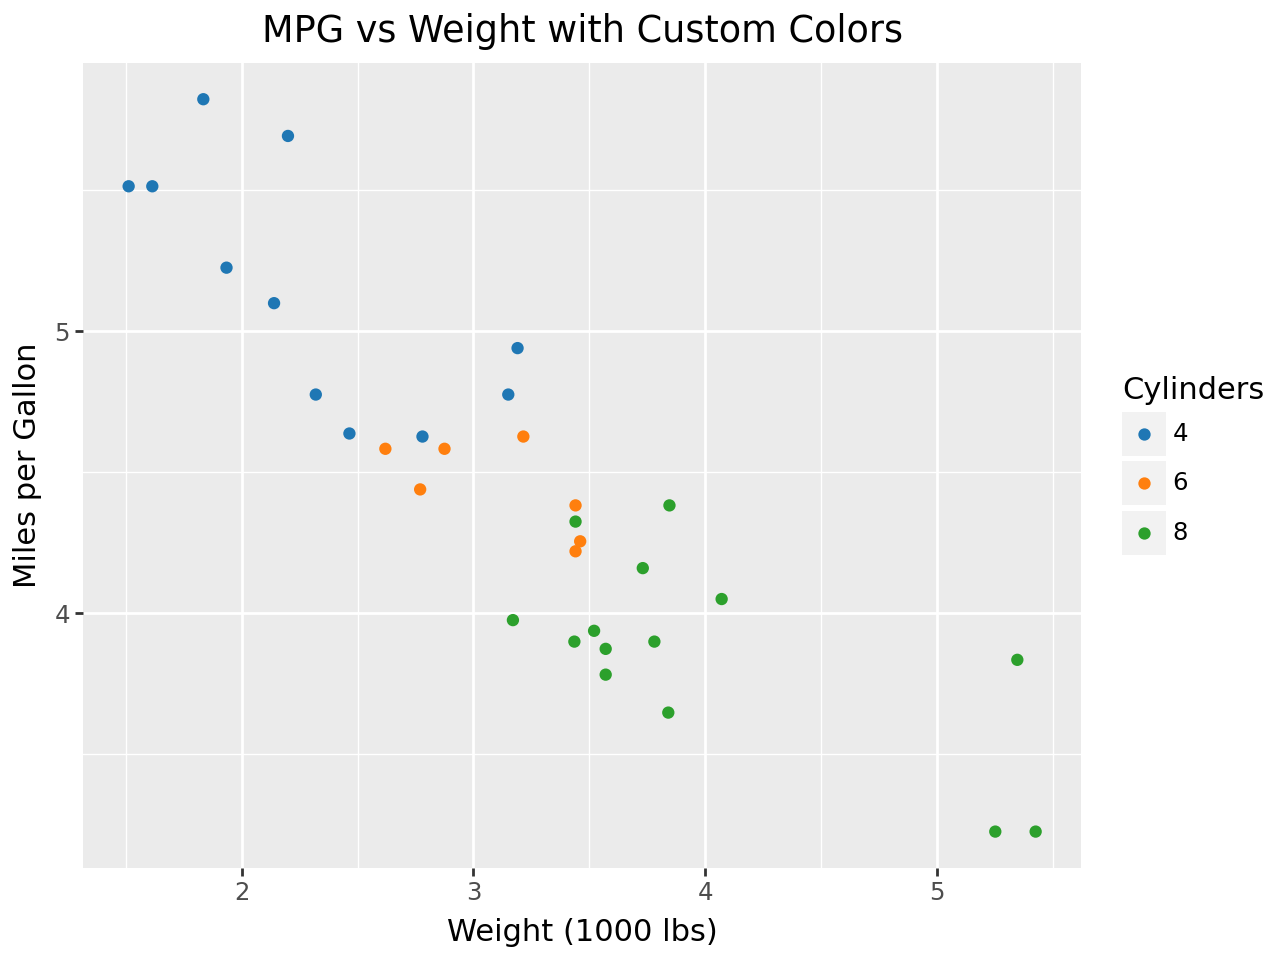

In [20]:
from plotnine import scale_color_manual

(ggplot(mtcars, aes(x='wt', y='mpg', color='factor(cyl)')) +
 geom_point() +
 scale_color_manual(values=['#1f77b4', '#ff7f0e', '#2ca02c']) +  # Custom colors
 labs(title='MPG vs Weight with Custom Colors',
      x='Weight (1000 lbs)',
      y='Miles per Gallon',
      color='Cylinders'))

# 8. Flip Coordinates
Create a bar plot showing distribution of cylinders



## Example: Fliping coordinates axis


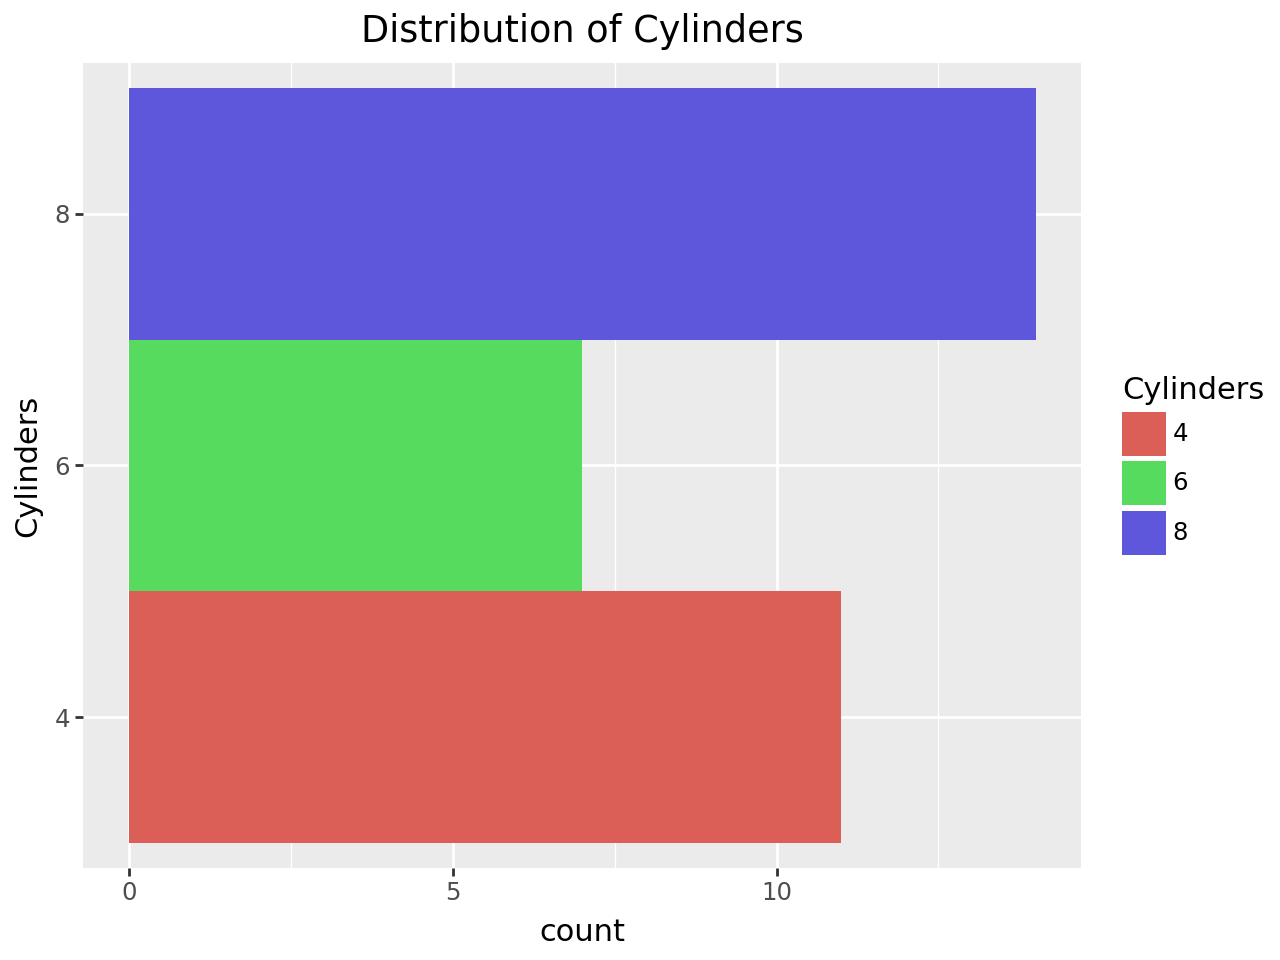

In [23]:
import pandas as pd
from plotnine import  geom_bar, coord_flip, labs

# Create a bar plot showing distribution of cylinders
(ggplot(mtcars, aes(x='factor(cyl)', fill='factor(cyl)')) +
 geom_bar(width=1) +
 coord_flip() +  # Flip coordinates as a simple workaround
 labs(title='Distribution of Cylinders',
      x='Cylinders',
      fill='Cylinders'))

In [25]:
# 9. Themes
Themes allow you to adjust the non-data aspects of the plot, such as background, axis labels, and gridlines.



SyntaxError: invalid syntax (837651606.py, line 2)

## Example: Apply a Minimal Theme


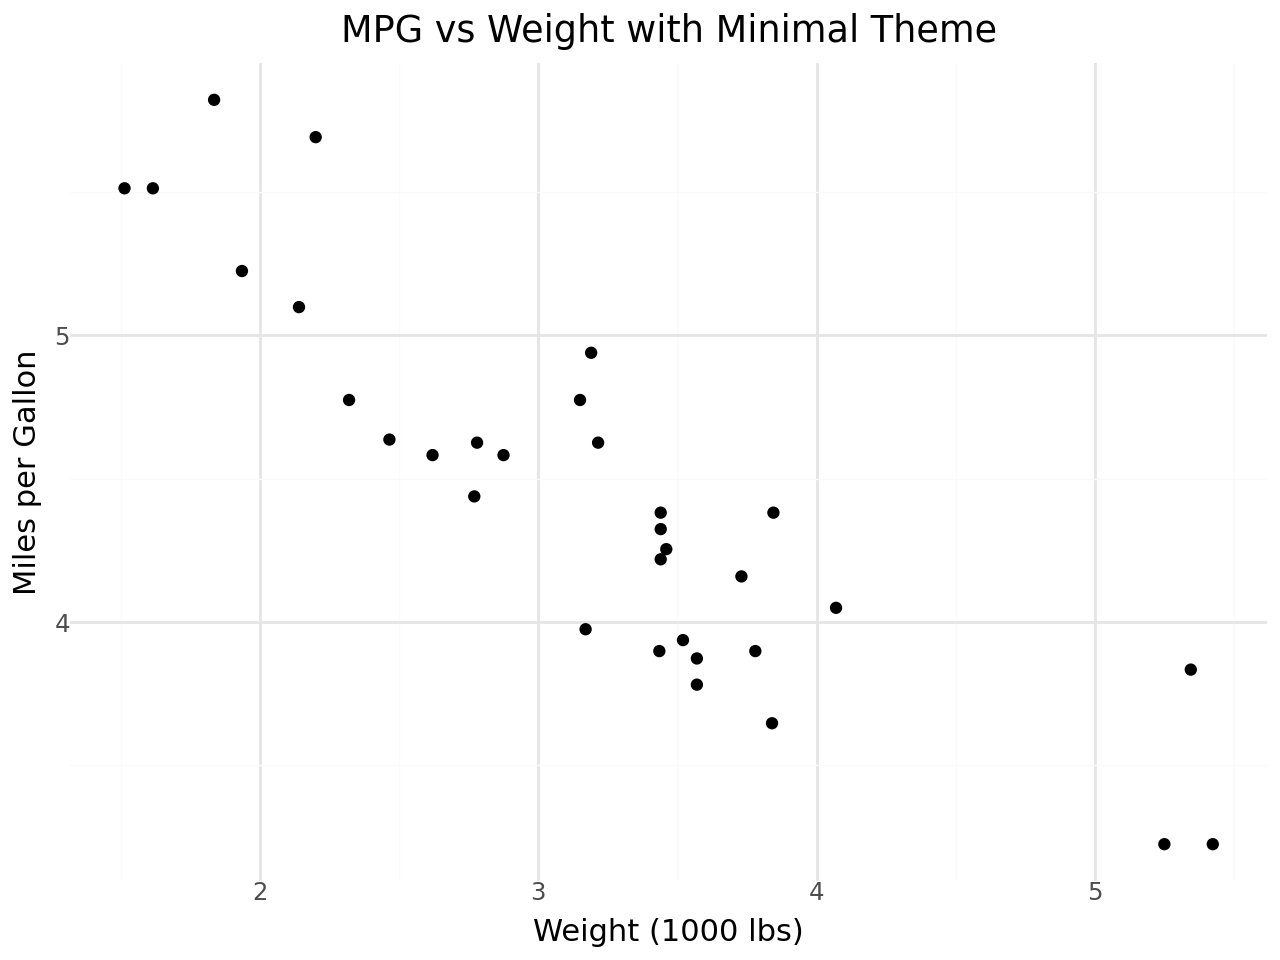

In [26]:
from plotnine import theme_minimal

(ggplot(mtcars, aes(x='wt', y='mpg')) +
 geom_point() +
 theme_minimal() +  # Minimalistic theme
 labs(title='MPG vs Weight with Minimal Theme',
      x='Weight (1000 lbs)',
      y='Miles per Gallon'))

# 10. Saving the Plot
You can save your plot using the save method.



In [27]:
## Example: Save the plot


In [64]:
# Save the plot to a file
p = (ggplot(mtcars, aes(x='wt', y='mpg')) +
     geom_point() +
     labs(title='MPG vs Weight',
          x='Weight (1000 lbs)',
          y='Miles per Gallon'))

p.save("mpg_vs_weight.png")

p = (ggplot(mtcars, aes(x='wt', y='mpg', color='factor(cyl)')) +
 geom_point() +
 labs(title='MPG vs Weight by Cylinder',
      x='Weight (1000 lbs)',
      y='Miles per Gallon',
      color='Cylinders'))

p.save("mpg_vs_weight_by_cylinder.png")

p = (ggplot(mtcars, aes(x='wt', y='mpg', color='factor(cyl)', size='hp')) +
 geom_point() +
 labs(title='MPG vs Weight by Cylinder and Horsepower',
      x='Weight (1000 lbs)',
      y='Miles per Gallon',
      color='Cylinders',
      size='Horsepower'))

p.save("mpg_vs_weight_by_cylinder_and_horsepower.png")


p = (ggplot(mtcars, aes(x='wt', y='mpg')) +
 geom_point() +
 geom_smooth(method='lm') +  # Linear regression line
 labs(title='MPG vs Weight with Regression Line',
      x='Weight (1000 lbs)',
      y='Miles per Gallon'))

p.save("mpg_vs_weight_with_regression_line.png")


p = (ggplot(mtcars, aes(x='wt', y='mpg')) +
 geom_point() +
 facet_wrap('~cyl') +  # Split into subplots by cylinders
 labs(title='MPG vs Weight Faceted by Cylinder',
      x='Weight (1000 lbs)',
      y='Miles per Gallon'))

p.save("mpg_vs_weight_faceted_by_cylinder.png")

p = (ggplot(mtcars, aes(x='wt', y='mpg', color='factor(cyl)')) +
 geom_point() +
 scale_color_manual(values=['#1f77b4', '#ff7f0e', '#2ca02c']) +  # Custom colors
 labs(title='MPG vs Weight with Custom Colors',
      x='Weight (1000 lbs)',
      y='Miles per Gallon',
      color='Cylinders'))

p.save("mpg_vs_weight_with_custom_colors.png")



p = (ggplot(mtcars, aes(x='factor(cyl)', fill='factor(cyl)')) +
 geom_bar(width=1) +
 coord_flip() +  # Flip coordinates as a simple workaround
 labs(title='Distribution of Cylinders',
      x='Cylinders',
      fill='Cylinders'))
p.save("distribution_of_cylinders.png")

p = (ggplot(mtcars, aes(x='wt', y='mpg')) +
 geom_point() +
 theme_minimal() +  # Minimalistic theme
 labs(title='MPG vs Weight with Minimal Theme',
      x='Weight (1000 lbs)',
      y='Miles per Gallon'))

p.save("MPG vs Weight with Minimal Theme.png")


C:\Users\Samuel Zelaya\venv477\Lib\site-packages\plotnine\ggplot.py:606: PlotnineWarning: Saving 6.4 x 4.8 in image.
C:\Users\Samuel Zelaya\venv477\Lib\site-packages\plotnine\ggplot.py:607: PlotnineWarning: Filename: mpg_vs_weight.png
C:\Users\Samuel Zelaya\venv477\Lib\site-packages\plotnine\ggplot.py:606: PlotnineWarning: Saving 6.4 x 4.8 in image.
C:\Users\Samuel Zelaya\venv477\Lib\site-packages\plotnine\ggplot.py:607: PlotnineWarning: Filename: mpg_vs_weight_by_cylinder.png
C:\Users\Samuel Zelaya\venv477\Lib\site-packages\plotnine\ggplot.py:606: PlotnineWarning: Saving 6.4 x 4.8 in image.
C:\Users\Samuel Zelaya\venv477\Lib\site-packages\plotnine\ggplot.py:607: PlotnineWarning: Filename: mpg_vs_weight_by_cylinder_and_horsepower.png
C:\Users\Samuel Zelaya\venv477\Lib\site-packages\plotnine\ggplot.py:606: PlotnineWarning: Saving 6.4 x 4.8 in image.
C:\Users\Samuel Zelaya\venv477\Lib\site-packages\plotnine\ggplot.py:607: PlotnineWarning: Filename: mpg_vs_weight_with_regression_line.png
